# Time-Series-Forecasting-SARIMA

<div class="alert alert-info">
    <font color=black>
    We download data for keyword 'car' from Google Trend. The data is between  2004 January to 2020 May. We first split this dataset into train and test set. After obtaining a model from train dataset, we use this model to predict test dataset. Lastly, we retrain the model obtained above on the full data and predict one year into the future.
    </font>
</div>

In [5]:
# Import libraries
import pandas as pd
import numpy as np
%matplotlib inline
from datetime import datetime

# Load specific forecasting tools
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # determine (p,q) orders
from statsmodels.tsa.seasonal import seasonal_decompose      # ETS Plots
from pmdarima import auto_arima                              # determine ARIMA orders

# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# Load datasets
car = pd.read_csv('../../Desktop/car.csv')
car.head()


,Month,car: (Canada)
0,Jan-04,83
1,Feb-04,82
2,Mar-04,87
3,Apr-04,91
4,May-04,96


In [6]:
# Add the date column
car['Year'] = car.index // 12 + 2004
car['Month'].apply(lambda x: datetime.strptime(str(x), '%b-%d'))

car['mon'] = car['Month'].apply(lambda x: datetime.strptime(x, '%b-%d'))
car['month'] = car['mon'].dt.month
car['day'] = car['mon'].dt.day
car = car.drop(columns='mon')
car['date'] = pd.to_datetime({'year':car['Year'],'month':car['month'],'day': 1})
car = car.drop(columns=['Year','month', 'day', 'Month'])

In [2]:
car['date'] = pd.to_datetime(car['date'])
#car.index.freq = 'MS'
car = car.set_index('date')
car.head()

,car: (Canada)
date,
2004-01-01,83
2004-02-01,82
2004-03-01,87
2004-04-01,91
2004-05-01,96


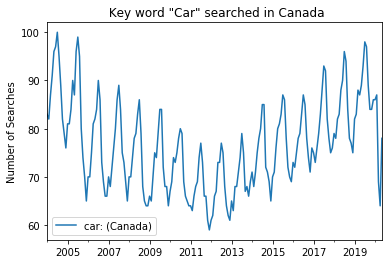

In [3]:
# Plot the source data
title = ' Key word "Car" searched in Canada'
ylabel = 'Number of Searches'

ax = car.plot(title=title)
ax.set(ylabel=ylabel, xlabel='');

In [4]:
car.columns

Index(['car: (Canada)'], dtype='object')

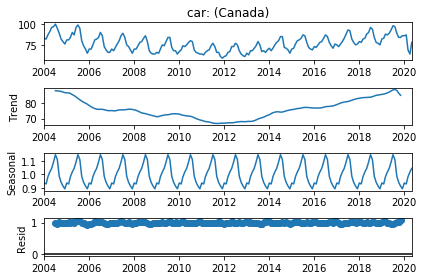

In [5]:
# ETS Decomposition
result = seasonal_decompose(car['car: (Canada)'],model='mul',freq=12)
result.plot();

In [6]:
# Use pmdarima.auto_arima to obtain recommended orders
auto_arima(car['car: (Canada)'], seasonal=True, m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  197
Model:             SARIMAX(2, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -484.591
Date:                            Wed, 03 Jun 2020   AIC                            983.183
Time:                                    08:45:12   BIC                           1006.129
Sample:                                         0   HQIC                           992.473
                                            - 197                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0009      0.004     -0.239      0.811      -0.008       0.006
ar.L1          0.7599      0.099      7.670      0.000       0.566       0.954
ar.L2         -0.1476      0.071     -2.087      0.037      -0.286      -0.009
ma.L1         -0.8645      0.104     -8.305      0.000      -1.068      -0.660
ar.S.L12       0.9783      0.017     56.134      0.000       0.944       1.012
ma.S.L12      -0.7011      0.120     -5.861      0.000      -0.936      -0.467
sigma2         7.4867      0.324     23.112      0.000       6.852       8.122
===================================================================================
Ljung-Box (Q):                       18.51   Jarque-Bera (JB):              3494.62
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.09   Skew:                            -2.74
Prob(H) (two-sided):                  0.00   Kurtosis:                        22.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [7]:
# split the data into train/test sets
train = car.iloc[:(len(car) - 12)]
test = car.iloc[(len(car)-12):]

# fit the obtained SARIMA model to the training set
model = SARIMAX(car['car: (Canada)'],order=(2,1,1),seasonal_order=(1,0,1,12))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                      car: (Canada)   No. Observations:                  197
Model:             SARIMAX(2, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -484.626
Date:                            Wed, 03 Jun 2020   AIC                            981.253
Time:                                    08:45:12   BIC                           1000.921
Sample:                                01-01-2004   HQIC                           989.216
                                     - 05-01-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7602      0.098      7.757      0.000       0.568       0.952
ar.L2         -0.1478      0.070     -2.124      0.034      -0.284      -0.011
ma.L1         -0.8641      0.102     -8.491      0.000      -1.064      -0.665
ar.S.L12       0.9786      0.016     59.548      0.000       0.946       1.011
ma.S.L12      -0.7024      0.116     -6.080      0.000      -0.929      -0.476
sigma2         7.4858      0.308     24.280      0.000       6.882       8.090
===================================================================================
Ljung-Box (Q):                       18.39   Jarque-Bera (JB):              3448.99
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.08   Skew:                            -2.73
Prob(H) (two-sided):                  0.00   Kurtosis:                        22.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

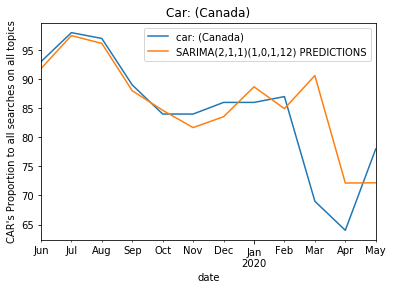

In [8]:
# obtain predicted values
# predicted values against the test set
start = len(train)
end = len(train) + len(test) - 1
predictions = results.predict(start,end,typ='levels') 
predictions = predictions.rename('SARIMA(2,1,1)(1,0,1,12) PREDICTIONS')

title = 'Car: (Canada)'
ylabel = 'CAR\'s Proportion to all searches on all topics'
ax = test['car: (Canada)'].plot(legend=True,title=title)
ax.set(ylabel=ylabel)
predictions.plot(legend=True);

 We overestimate the searching proportion for keyword CAR in March and April.


In [9]:
# Evaluate the Model using RMSE and MSE
from statsmodels.tools.eval_measures import rmse
error1 = rmse(test['car: (Canada)'], predictions)
print(f'SARIMA(2,1,1)(1,0,1,12) rmse error: {error1:11.9}')

from sklearn.metrics import mean_squared_error
error = mean_squared_error(test['car: (Canada)'], predictions)
print(f'SARIMA(2,1,1)(1,0,1,12) MSE error: {error:11.9}')

SARIMA(2,1,1)(1,0,1,12) rmse error:  7.03662145
SARIMA(2,1,1)(1,0,1,12) MSE error:  49.5140415


In [10]:
# Retrain the model on the full data and predict one year into the future
model = SARIMAX(car['car: (Canada)'], order=(2,1,1), seasonal_order=(1,0,1,12))
results = model.fit()
fcast = results.predict(len(car)-1, len(car)+11, typ='levels').rename('SARIMA FORECAST')


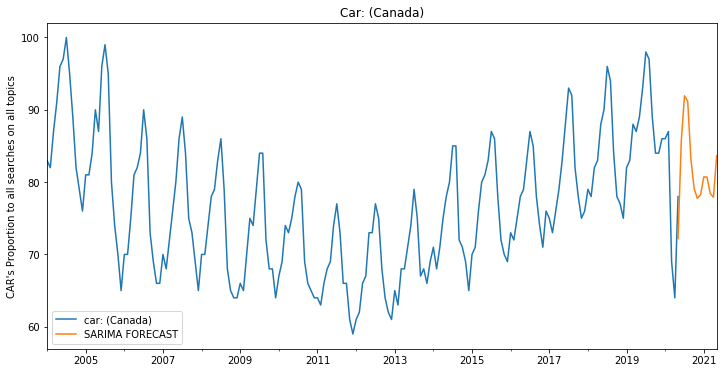

In [11]:
# Plot the forecasted values alongside the original full data
title='Car: (Canada)'
ylabel='CAR\'s Proportion to all searches on all topics'
xlabel=''

ax = car['car: (Canada)'].plot(legend=True,title=title, figsize=(12,6))
fcast.plot(legend=True)
ax.set(xlabel=xlabel, ylabel=ylabel);